In [3]:
import pandas as pd
import random

In [4]:
comments_df = pd.read_pickle('WSB_Comments.pickle')

In [5]:
def contains_word(s, w):
    return (' ' + w + ' ') in (' ' + s + ' ')

In [6]:
def stock_comments(ticker):
    stock_comments_list = list()
    for comment in comments_df.itertuples():
        if contains_word(comment.body, ticker):
            stock_comments_list.append(comment.body)
    return stock_comments_list



In [7]:
def random_stock_comments(ticker, number):
    temp_list = stock_comments(ticker)
    random.shuffle(temp_list)
    return temp_list[:number]

In [8]:
you_comments_list=stock_comments('YOU')
you_comments_list
random.shuffle(you_comments_list)
you_comments_list[:20]
random_stock_comments('YOU',25)
clean_tickers = pd.read_pickle('clean_tickers.pickle')
clean_tickers.head(35)
random_stock_comments('GME',30)
random_stock_comments('AMC',25)
random_stock_comments('PLTR',25)
random_stock_comments('YOU',25)
random_stock_comments('NOK',30)
random_stock_comments('SNDL',30)
random_stock_comments('WISH',30)
random_stock_comments('TSLA',30)
random_stock_comments('CLOV',30)
random_stock_comments('MVIS',30)
random_stock_comments('CLNE',30)
random_stock_comments('FOR',30)
random_stock_comments('TLRY',30)
random_stock_comments('ALL',30)
random_stock_comments('ALL',30)
random_stock_comments('GET',30)
random_stock_comments('MIND',30)
random_stock_comments('UWMC',30)
random_stock_comments('EOD',30)
random_stock_comments('AAPL',30)
random_stock_comments('RKT',30)
random_stock_comments('CAN',30)
random_stock_comments('PLAY',30)
random_stock_comments('PLAY',30)
random_stock_comments('WKHS',30)
random_stock_comments('NIO',30)
random_stock_comments('EDIT',30)
random_stock_comments('CLF',30)
random_stock_comments('OUT',30)
random_stock_comments('AMD',30)
random_stock_comments('AMD',30)
random_stock_comments('NOW',30)
random_stock_comments('SPCE',30)
random_stock_comments('SEE',30)
new_clean_tickers = clean_tickers.head(35)
filtered_tickers = pd.read_csv('buy_sell_tickers.csv')

In [9]:
filtered_tickers

,row,ticker,frequency,score,buy_bin
0,27,GME,7554,360351,buy
1,23,AMC,5879,206158,buy
2,7,PLTR,4992,90611,buy
3,71,YOU,934,57297,bin
4,92,NOK,936,44803,buy
5,32,SNDL,1252,37284,buy
6,9,WISH,1826,35522,buy
7,25,TSLA,2119,30824,buy
8,28,CLOV,1544,28758,buy
9,117,MVIS,1303,27584,buy


In [10]:
more_clean_tickers = filtered_tickers[(filtered_tickers['buy_bin']=='buy')]

In [11]:
more_clean_tickers

,row,ticker,frequency,score,buy_bin
0,27,GME,7554,360351,buy
1,23,AMC,5879,206158,buy
2,7,PLTR,4992,90611,buy
4,92,NOK,936,44803,buy
5,32,SNDL,1252,37284,buy
6,9,WISH,1826,35522,buy
7,25,TSLA,2119,30824,buy
8,28,CLOV,1544,28758,buy
9,117,MVIS,1303,27584,buy
10,1,CLNE,1373,26641,buy


In [12]:
more_clean_tickers.to_csv('filtered_clean_tickers.csv')
more_clean_tickers.to_pickle('filtered_clean_tickers.pickle')

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/gitpod/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
def stock_comment_sentiment(ticker):
    comment_sentiment = list()
    comment_list = stock_comments(ticker)
    affin=open('AFINN_english.txt')
    sentimentScores={}

    for line in affin:
	    term, score = line.split("\t")
	    sentimentScores[term] = float(score)

    for comment in comment_list:
        words = word_tokenize(comment)
        score=0
        for word in words:
            try:
                score += sentimentScores[word]
            except:
                pass
        comment_sentiment.append(score)
    return statistics.mean(comment_sentiment)
    # return comment_sentiment

In [15]:
import statistics

In [16]:
sent_tickers = more_clean_tickers.drop(labels=['row','buy_bin'],axis=1)

In [17]:
sent_tickers = sent_tickers.reset_index(drop=True)

In [18]:
sent_tickers

,ticker,frequency,score
0,GME,7554,360351
1,AMC,5879,206158
2,PLTR,4992,90611
3,NOK,936,44803
4,SNDL,1252,37284
5,WISH,1826,35522
6,TSLA,2119,30824
7,CLOV,1544,28758
8,MVIS,1303,27584
9,CLNE,1373,26641


In [19]:
stock_sentiments=list()
for stock in sent_tickers.itertuples():
    stock_sentiments.append(stock_comment_sentiment(stock.ticker))
    # sent_tickers=sent_tickers.append({
    #     'sentiment':stock_comment_sentiment(stock.ticker)
    # },ignore_index=True)
sent_tickers['sentiment']=stock_sentiments

In [20]:
sent_tickers.to_pickle('sent_tickers.pickle')
sent_tickers.to_csv('sent_tickers.csv')

In [21]:
sent_tickers

,ticker,frequency,score,sentiment
0,GME,7554,360351,-0.262132
1,AMC,5879,206158,-0.106998
2,PLTR,4992,90611,-0.315492
3,NOK,936,44803,-0.119782
4,SNDL,1252,37284,-0.120638
5,WISH,1826,35522,0.000000
6,TSLA,2119,30824,-0.310731
7,CLOV,1544,28758,-0.105088
8,MVIS,1303,27584,-0.026490
9,CLNE,1373,26641,0.139644


In [24]:
random_stock_comments('TSLA',1)

['Alright TSLA is getting a little ridiculous now.  This can’t be healthy lol']

In [25]:
top_10= sent_tickers.head(10)
top_10_sent=top_10.sort_values(by=['sentiment'],ascending=False)

In [26]:
top_10_sent

,ticker,frequency,score,sentiment
9,CLNE,1373,26641,0.139644
5,WISH,1826,35522,0.000000
8,MVIS,1303,27584,-0.026490
7,CLOV,1544,28758,-0.105088
1,AMC,5879,206158,-0.106998
3,NOK,936,44803,-0.119782
4,SNDL,1252,37284,-0.120638
0,GME,7554,360351,-0.262132
6,TSLA,2119,30824,-0.310731
2,PLTR,4992,90611,-0.315492


In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='score', ylabel='sentiment'>

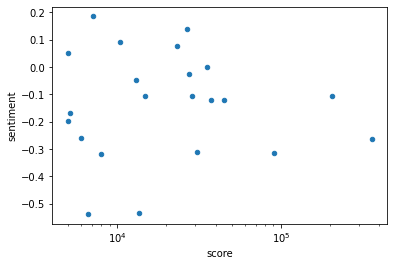

In [33]:
sent_tickers.plot(x='score',y='sentiment',kind='scatter',logx=True)

In [32]:
sent_tickers = sent_tickers[(sent_tickers['sentiment']>-2.0)]

In [34]:
import numpy as np

In [36]:
sent_tickers['score'].corr(sent_tickers['sentiment'])

-0.12467869418661427

<AxesSubplot:xlabel='index', ylabel='sentiment'>

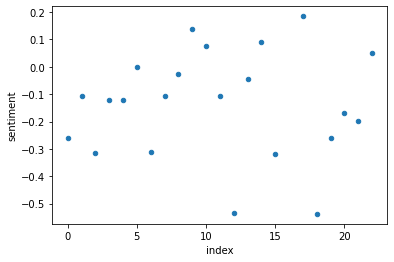

In [38]:
sent_tickers.reset_index().plot(x='index',y='sentiment',kind='scatter')

In [43]:
random_stock_comments('TSLA',20)

['TSLA is the only thing that’s green or the last thing is green. Will see tomorrow',
 'TSLA SHOWING RETARD STRENGTH',
 'Why does TSLA hate 700',
 "Feeling cute, might go all in on 4/16 TSLA 860c's today 🥺",
 "Jacking off to the TSLA chart is better than porn, and I'll fight anyone who thinks otherwise",
 'Last time TSLA went this low was on a Friday Jan. 29 and the next Monday it exploded. These calls have to go to the moon 🚀🚀🚀',
 'TSLA has destroyed me yet again',
 'I bought TSLA calls at the top, AMA🤡',
 'My TSLA calls swinging between -50% and +80% all day. \n\nWho needs cocaine and viagra when you can trade TSLA weeklies',
 'I like TSLA at this price',
 'My heart goes out to Michael Burry and his very sad TSLA puts he bought yesterday morning',
 'TSLA what are you doing? 😫',
 'TSLA is going to 300\n\nAfter it splits again',
 'I would like to initiate my TSLA plunge insurance now',
 'That feeling when you were up $200 on TSLA calls and now back in the red.',
 'TSLA to hit 800 today

In [44]:
sector_stocks = pd.read_pickle('top_25_with_sectors.pickle')

In [45]:
sector_stocks.head()

,row,ticker,frequency,Industry,score,buy_bin
0,27,GME,7554,Consumer Cyclical,360351,buy
1,23,AMC,5879,Communication Services,206158,buy
2,7,PLTR,4992,Technology,90611,buy
3,92,NOK,936,Technology,44803,buy
4,32,SNDL,1252,Healthcare,37284,buy


In [47]:
len(sector_stocks)

23

In [76]:
sectors = pd.DataFrame()
for stock in sector_stocks.itertuples():
    #print(stock)
     if len(sectors)==0:
         sectors = sectors.append({'industry':stock.Industry,'score':stock.score,'frequency':1},ignore_index=True)
         print(stock.score)
     elif (stock.Industry not in sectors['industry'].values):
          sectors = sectors.append({'industry':stock.Industry, 'score':stock.score, 'frequency':1},ignore_index=True)
     else:
          index=sectors.index[sectors.industry==stock.Industry][0]
          sectors.at[index,'frequency']+=1
          sectors.at[index,'score']+=stock.score

360351


In [77]:
sectors

,industry,score,frequency
0,Consumer Cyclical,450091.0,6.0
1,Communication Services,206158.0,1.0
2,Technology,188390.0,6.0
3,Healthcare,101287.0,5.0
4,Energy,26641.0,1.0
5,Financial Services,27872.0,2.0
6,Basic Materials,7090.0,1.0
7,Industrials,6017.0,1.0


([<matplotlib.patches.Wedge at 0x7f0c743a1a90>,
 [Text(0.5768048750604493, 3.2491993069226304, 'Consumer Cyclical'),
  Text(-3.1644371923331653, -0.9361288670789902, 'Communication Services'),
  Text(-0.19863345056955625, -3.294016507595982, 'Technology'),
  Text(2.4521527127279286, -2.2083810978771443, 'Healthcare'),
  Text(3.1147989265834055, -1.0899668100244457, 'Energy'),
  Text(3.253735421469762, -0.5506412689519304, 'Financial Services'),
  Text(3.2942040358042144, -0.1954987736310068, 'Basic Materials'),
  Text(3.2994260952298213, -0.06154219785234182, 'Industrials')],
 [Text(0.4719312614130949, 2.658435796573061, '44%'),
  Text(-2.589084975545317, -0.7659236185191739, '20%'),
  Text(-0.16251827773872785, -2.6951044153058037, '19%'),
  Text(2.006306764959214, -1.8068572618994818, '10%'),
  Text(2.5484718490227865, -0.8917910263836374, '3%'),
  Text(2.6621471630207143, -0.450524674597034, '3%'),
  Text(2.6952578474761753, -0.15995354206173282, '1%'),
  Text(2.699530441551672, -0.

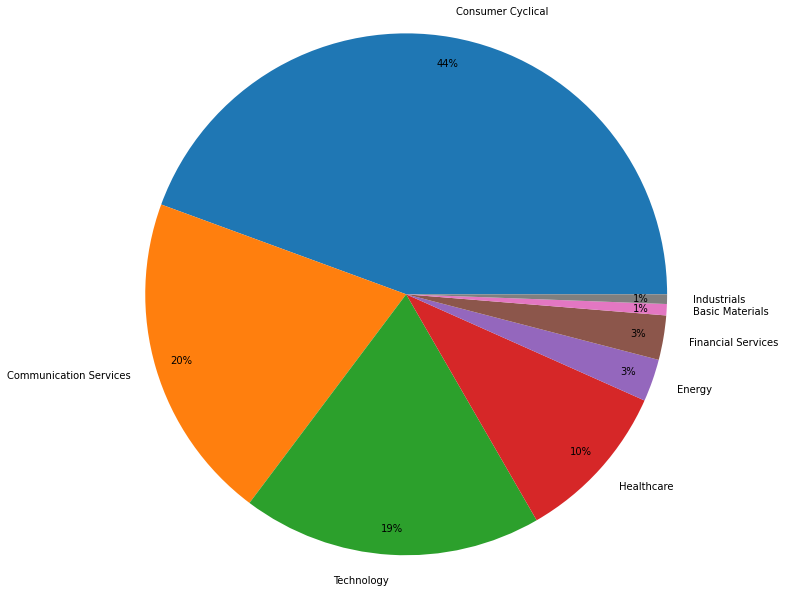

In [89]:
plt.pie(sectors['score'], labels=sectors['industry'],radius=3,autopct='%1.0f%%',pctdistance=0.9)

In [91]:
sector_stocks.drop(columns=['row','buy_bin'])

,ticker,frequency,Industry,score
0,GME,7554,Consumer Cyclical,360351
1,AMC,5879,Communication Services,206158
2,PLTR,4992,Technology,90611
3,NOK,936,Technology,44803
4,SNDL,1252,Healthcare,37284
5,WISH,1826,Consumer Cyclical,35522
6,TSLA,2119,Consumer Cyclical,30824
7,CLOV,1544,Healthcare,28758
8,MVIS,1303,Technology,27584
9,CLNE,1373,Energy,26641


In [96]:
random_stock_comments('AMC',10)

['We can push AMC again! We can!',
 'Can we get some fucking volume on AMC to bring this shit show down.',
 'AMC is still cheap everyone.',
 'AMC is fueling up, lift off in T minus.....',
 'AMC is crazy and so are all you beautiful people',
 'AMC TO $30🚀🙌🏻',
 'AMC needs a nice 300% day like GME',
 'AMC taking off brossss',
 'HOLD AMC',
 'AMC TO 10  🚀🚀🚀🚀🚀']

In [99]:
reading_level_df=pd.read_pickle('comments_reading_level.pickle')
reading_level_df.head()

,id,post_id,body,score,Reading Level
0,h3k25lx,t3_oau3cr,Man this place has become a P and D bag holder...,62.0,4.4
1,h3kzurx,t3_oau3cr,"profession: stock guy \r\nsalary: -1,000 a day",44.0,2.5
2,h3jmbhk,t3_oau3cr,My wife insisted on a fucking fountain in our ...,118.0,7.9
3,h3jvrgk,t3_oau3cr,Depression is back on the menu?,33.0,2.1
4,h3ktyuh,t3_oau3cr,My options are fucked. Both in the market and ...,30.0,0.5


In [2]:
import pandas as pd
temp_df = pd.read_pickle('top_25_with_sectors.pickle')

In [3]:
temp_df.head()

,row,ticker,frequency,Industry,score,buy_bin
0,27,GME,7554,Consumer Cyclical,360351,buy
1,23,AMC,5879,Communication Services,206158,buy
2,7,PLTR,4992,Technology,90611,buy
3,92,NOK,936,Technology,44803,buy
4,32,SNDL,1252,Healthcare,37284,buy


In [5]:
temp_df.reset_index(drop=True)

,row,ticker,frequency,Industry,score,buy_bin
0,27,GME,7554,Consumer Cyclical,360351,buy
1,23,AMC,5879,Communication Services,206158,buy
2,7,PLTR,4992,Technology,90611,buy
3,92,NOK,936,Technology,44803,buy
4,32,SNDL,1252,Healthcare,37284,buy
5,9,WISH,1826,Consumer Cyclical,35522,buy
6,25,TSLA,2119,Consumer Cyclical,30824,buy
7,28,CLOV,1544,Healthcare,28758,buy
8,117,MVIS,1303,Technology,27584,buy
9,1,CLNE,1373,Energy,26641,buy


In [10]:
temp_df=temp_df.drop(columns={'row','buy_bin'})

In [ ]:
temp_df.to_csv('final_dataset.csv')
temp_df.to_pickle('final_dataset.pickle')